In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_dev = x_train[-5000:]
y_dev = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_dev.shape)
print(x_dev.shape)

(55000, 28, 28)
(10000, 28, 28)
(55000,)
(10000,)
(5000, 28, 28)
(5000, 28, 28)


In [6]:
# one-hot format
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

y_dev = np_utils.to_categorical(y_dev, 10)
print(y_dev.shape)

(55000, 10)
(10000, 10)
(5000, 10)


In [7]:
# [0-255] to [0-1]
x_train = x_train / 255.0
x_dev = x_dev / 255.0
x_test = x_test / 255.0

In [8]:
# define model
# 3-layer-NN (512 nodes, 512 nodes, 10 nodes - 2 hidden layers, output layer)
# L2 regulation to prevent overfitting(reduce variance)
# relu activation function for hidden layers & softmax for output layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # (60000, 758)
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
# define optimizer, loss function, metrics

model.compile(
    # Optimizer
    
    optimizer=tf.keras.optimizers.Adam(),
    # Adam = grad descent w momentum + RMSprop
    
    
    # Loss function to minimize

#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # use this loss function when 2 or more integer label classes
    # logit = logistic + probit(확률을 재는 단위, = odds(두 확률의 비율)); 값이 0보다 큰지 아닌지, sigmoid의 역함수
    # 라벨값이 0 ~ 9로 되어있기 떄문에 사실은 One Hot Encoding을 해야 하는데,
    # sparse categorical crossentropy 를 사용하면 같은 효과 나와서 따로 하지 않음

    loss='categorical_crossentropy',
#     cross-entropy: a measure of how different your predicted distribution is from the target distribution

    # List of metrics to monitor
    
    metrics=['accuracy']
    # must be list (can be more than one if more than one output)
)

In [10]:
start = time.time()

In [11]:
# train
model_fit = model.fit(x_train, y_train,
    batch_size=128, epochs=10, verbose=1,
    # verbose : 0 silent, 1 progress bar, 2 one line per epoch
    validation_data=(x_dev, y_dev)
)
# epsilon = None (1e-07)

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 0.3218 - accuracy: 0.9313 - val_loss: 0.1929 - val_accuracy: 0.9674
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1685 - accuracy: 0.9730 - val_loss: 0.1668 - val_accuracy: 0.9742
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1344 - accuracy: 0.9810 - val_loss: 0.1479 - val_accuracy: 0.9778
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.9845 - val_loss: 0.1493 - val_accuracy: 0.9732
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1035 - accuracy: 0.9867 - val_loss: 0.1393 - val_accuracy: 0.9784
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0936 - accuracy: 0.9892 - val_loss: 0.1422 - val_accuracy: 0.9778
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9898 - val_loss: 0.1425 - val_accuracy: 0.9758
Epoch 

In [12]:
print('training time: ', time.time() - start)

training time:  21.567689895629883


train loss:  0.07410373538732529
train accuracy:  0.9919818043708801
dev loss:  0.1121583878993988
dev accuracy:  0.982200026512146


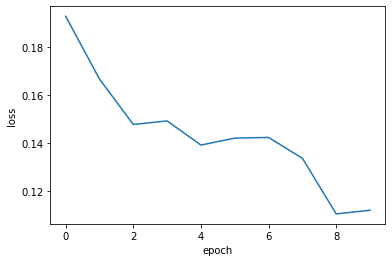

In [13]:
train_loss = model_fit.history['loss'][-1]
train_acc = model_fit.history['accuracy'][-1]
dev_loss = model_fit.history['val_loss'][-1]
dev_acc = model_fit.history['val_accuracy'][-1]

print('train loss: ', train_loss)
print('train accuracy: ', train_acc)

print('dev loss: ', dev_loss)
print('dev accuracy: ', dev_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
# evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)

print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

79/79 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9808
test loss:  0.11664816737174988
test accuracy:  0.9807999730110168


Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 0.3235 - accuracy: 0.9312 - val_loss: 0.1867 - val_accuracy: 0.9700
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1691 - accuracy: 0.9733 - val_loss: 0.1526 - val_accuracy: 0.9766
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1336 - accuracy: 0.9815 - val_loss: 0.1501 - val_accuracy: 0.9742
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1168 - accuracy: 0.9836 - val_loss: 0.1377 - val_accuracy: 0.9792
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1029 - accuracy: 0.9871 - val_loss: 0.1291 - val_accuracy: 0.9808
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0927 - accuracy: 0.9892 - val_loss: 0.1307 - val_accuracy: 0.9800
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9895 - val_loss: 0.1252 - val_accuracy: 0.9782
Epoch 

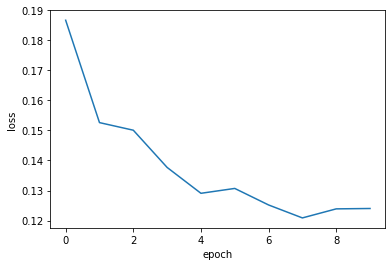

In [15]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=10, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/5
430/430 [==============================] - 2s 5ms/step - loss: 0.3235 - accuracy: 0.9313 - val_loss: 0.1949 - val_accuracy: 0.9666
Epoch 2/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1718 - accuracy: 0.9717 - val_loss: 0.1558 - val_accuracy: 0.9764
Epoch 3/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1354 - accuracy: 0.9804 - val_loss: 0.1497 - val_accuracy: 0.9754
Epoch 4/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1160 - accuracy: 0.9846 - val_loss: 0.1459 - val_accuracy: 0.9766
Epoch 5/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1025 - accuracy: 0.9869 - val_loss: 0.1404 - val_accuracy: 0.9768
training time:  10.926638126373291
train loss:  0.10250525921583176
train accuracy:  0.9869454503059387
dev loss:  0.14042852818965912
dev accuracy:  0.9768000245094299
79/79 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9761
test loss:  0.13866576552391052
test ac

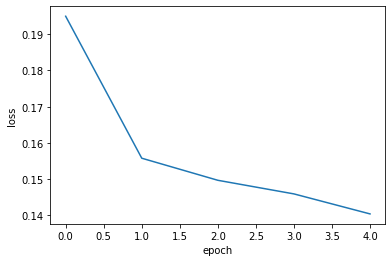

In [16]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=5, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.3756 - accuracy: 0.9189 - val_loss: 0.1905 - val_accuracy: 0.9690
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1875 - accuracy: 0.9689 - val_loss: 0.1742 - val_accuracy: 0.9736
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1448 - accuracy: 0.9801 - val_loss: 0.1489 - val_accuracy: 0.9794
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1218 - accuracy: 0.9850 - val_loss: 0.1474 - val_accuracy: 0.9770
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1087 - accuracy: 0.9880 - val_loss: 0.1437 - val_accuracy: 0.9778
training time:  6.737459659576416
train loss:  0.10869774222373962
train accuracy:  0.9880181550979614
dev loss:  0.14372867345809937
dev accuracy:  0.9778000116348267
79/79 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9770
test loss:  0.13930703699588776
test acc

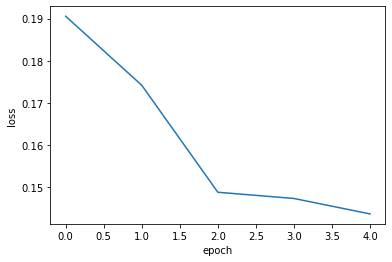

In [17]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=256, epochs=5, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3715 - accuracy: 0.9205 - val_loss: 0.1922 - val_accuracy: 0.9712
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1850 - accuracy: 0.9700 - val_loss: 0.1608 - val_accuracy: 0.9752
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1425 - accuracy: 0.9809 - val_loss: 0.1448 - val_accuracy: 0.9802
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1205 - accuracy: 0.9856 - val_loss: 0.1362 - val_accuracy: 0.9806
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1061 - accuracy: 0.9881 - val_loss: 0.1319 - val_accuracy: 0.9810
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0952 - accuracy: 0.9906 - val_loss: 0.1245 - val_accuracy: 0.9824
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0851 - accuracy: 0.9922 - val_loss: 0.1213 - val_accuracy: 0.9816
Epoch 

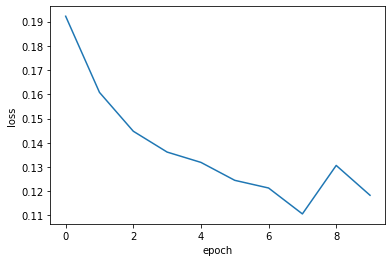

{'loss': [0.37151914834976196, 0.1849982589483261, 0.14252254366874695, 0.12046100944280624, 0.10605477541685104, 0.09516654163599014, 0.08507995307445526, 0.0772944986820221, 0.07403191924095154, 0.07028234750032425], 'accuracy': [0.9205272793769836, 0.9700363874435425, 0.9809091091156006, 0.9855636358261108, 0.9880545735359192, 0.9905818104743958, 0.9921636581420898, 0.9934181571006775, 0.993254542350769, 0.9937090873718262], 'val_loss': [0.1922018975019455, 0.1607772707939148, 0.14475290477275848, 0.13615790009498596, 0.13189727067947388, 0.1244988739490509, 0.12132884562015533, 0.11063962429761887, 0.1306428760290146, 0.11833198368549347], 'val_accuracy': [0.9711999893188477, 0.9751999974250793, 0.9801999926567078, 0.9805999994277954, 0.9810000061988831, 0.9824000000953674, 0.9815999865531921, 0.9860000014305115, 0.9800000190734863, 0.9814000129699707]}


In [19]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=256, epochs=10, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

print(model_fit.history)

Epoch 1/8
215/215 [==============================] - 2s 6ms/step - loss: 0.3753 - accuracy: 0.9189 - val_loss: 0.1929 - val_accuracy: 0.9676
Epoch 2/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1852 - accuracy: 0.9698 - val_loss: 0.1620 - val_accuracy: 0.9762
Epoch 3/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1437 - accuracy: 0.9802 - val_loss: 0.1498 - val_accuracy: 0.9778
Epoch 4/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1201 - accuracy: 0.9853 - val_loss: 0.1358 - val_accuracy: 0.9802
Epoch 5/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1059 - accuracy: 0.9883 - val_loss: 0.1304 - val_accuracy: 0.9824
Epoch 6/8
215/215 [==============================] - 1s 6ms/step - loss: 0.0933 - accuracy: 0.9906 - val_loss: 0.1246 - val_accuracy: 0.9810
Epoch 7/8
215/215 [==============================] - 1s 6ms/step - loss: 0.0828 - accuracy: 0.9921 - val_loss: 0.1255 - val_accuracy: 0.9802
Epoch 8/8
215

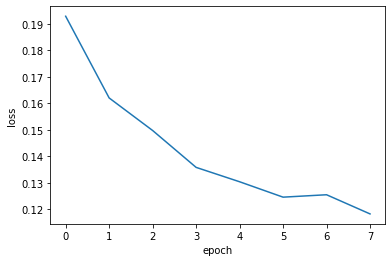

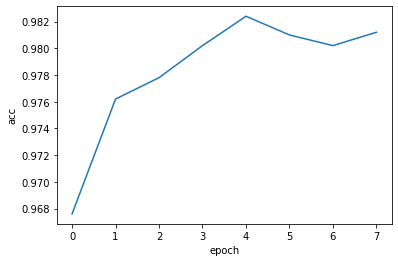

In [22]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=256, epochs=8, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

Epoch 1/8
430/430 [==============================] - 3s 5ms/step - loss: 0.3236 - accuracy: 0.9318 - val_loss: 0.2004 - val_accuracy: 0.9660
Epoch 2/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1708 - accuracy: 0.9724 - val_loss: 0.1610 - val_accuracy: 0.9728
Epoch 3/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1352 - accuracy: 0.9810 - val_loss: 0.1636 - val_accuracy: 0.9714
Epoch 4/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1165 - accuracy: 0.9849 - val_loss: 0.1252 - val_accuracy: 0.9808
Epoch 5/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1027 - accuracy: 0.9870 - val_loss: 0.1263 - val_accuracy: 0.9804
Epoch 6/8
430/430 [==============================] - 2s 5ms/step - loss: 0.0947 - accuracy: 0.9886 - val_loss: 0.1209 - val_accuracy: 0.9826
Epoch 7/8
430/430 [==============================] - 2s 5ms/step - loss: 0.0894 - accuracy: 0.9887 - val_loss: 0.1277 - val_accuracy: 0.9790
Epoch 8/8
430

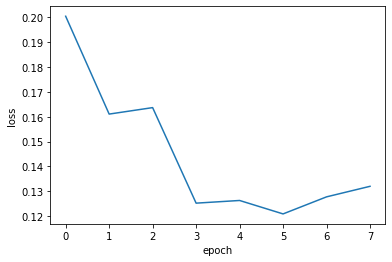

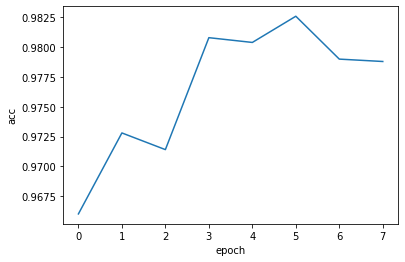

In [23]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=8, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

Epoch 1/10
428/430 [============================>.] - ETA: 0s - loss: 0.3226 - accuracy: 0.9303
Epoch 1: val_loss improved from inf to 0.19273, saving model to best_model.h5
430/430 [==============================] - 2s 5ms/step - loss: 0.3220 - accuracy: 0.9305 - val_loss: 0.1927 - val_accuracy: 0.9690
Epoch 2/10
420/430 [============================>.] - ETA: 0s - loss: 0.1680 - accuracy: 0.9735
Epoch 2: val_loss improved from 0.19273 to 0.15528, saving model to best_model.h5
430/430 [==============================] - 2s 5ms/step - loss: 0.1676 - accuracy: 0.9736 - val_loss: 0.1553 - val_accuracy: 0.9774
Epoch 3/10
423/430 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.9814
Epoch 3: val_loss improved from 0.15528 to 0.13516, saving model to best_model.h5
430/430 [==============================] - 2s 5ms/step - loss: 0.1341 - accuracy: 0.9813 - val_loss: 0.1352 - val_accuracy: 0.9812
Epoch 4/10
424/430 [============================>.] - ETA: 0s - loss: 0.1148 

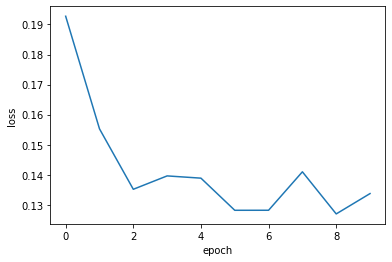

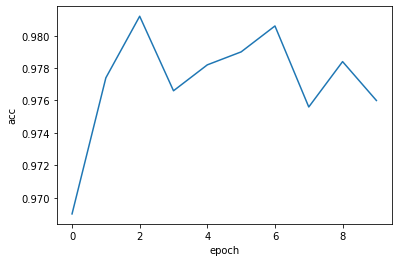

In [27]:
# early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=10, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()